# Liner Regression with mpg dataset

## Imports

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# imoort train test split
from sklearn.model_selection import train_test_split

# Note, seaborn is not available in Jupyter Lite, use Collab or a local environment
import seaborn as sns # we use this library to load the dataset

## Pandas References

You can use `pandas_summary` file throughout this notebook to get a quick reference to pandas functions. The file is located in the same directory as this notebook.|


## Load data

In [104]:
# Load the 'mpg' dataset using seaborn library into a Pandas DataFrame
df = sns.load_dataset('mpg')

MPG dataset can be viewed online at  
https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv

#### What is the type of the dateset? (type(df))

In [105]:
#your code here
print(type(df))

<class 'pandas.core.frame.DataFrame'>


`DataFrame` is a fundamental Pandas structure. It is essentially a table with rows and columns. You can think of it as a spreadsheet or SQL table. DataFrames are particularly useful because they can handle a large amount of data and are very fast.

#### Show the first 5 rows of the dataset

In [106]:
#your code here
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Data Preprocessing


Since most cars weight around 1-2 tons, it's convenient to convert the weight to metric tons here

$
\text{tons} = \frac{\text{pounds}}{2204.62}
$

Converting gas usage to Litres per 100km is important to get a better linear fit

$
\text{lphk} = \frac{235.214}{\text{MPG}}
$


#### Change the weight column to metric tons and add one column for `lphk`

In [107]:
# your code here
df["metric tons"] = df["weight"] / 2204.62
df["lphk"] = 235.214 / df["mpg"]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,metric tons,lphk
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,1.589390,13.067444
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,1.675119,15.680933
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,1.558545,13.067444
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,1.557184,14.700875
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,1.564442,13.836118


### Handing missing data

In [108]:
# We will use these 4 columns as potential explanatory variables for fuel consumption (lphk)
fit_cols = ['weight', 'cylinders', 'displacement', 'horsepower']

# Discard several rows with missing values in the columns we want to use for fitting
df = df.dropna(subset=fit_cols)

#### Use df.head() again to see the changes (unit conversion and missing data)

In [109]:
# your code here
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,metric tons,lphk
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,1.589390,13.067444
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,1.675119,15.680933
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,1.558545,13.067444
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,1.557184,14.700875
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,1.564442,13.836118


#### Take a look at df.shape, how many cars are in this dataset, and how many features per car?

In [110]:
# your code here
df.shape

(392, 11)

### Important Notes

You can access columns in both notations `df['weight']` or `df.weight`.  
But if you want to define a new column, it must be `df['new_col_name']`

## Data Visualization

#### Plot a histogram of car weights

#### pass `edgecolor='black'` to buitify the histogram

(array([30., 89., 58., 52., 36., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <BarContainer object of 10 artists>)

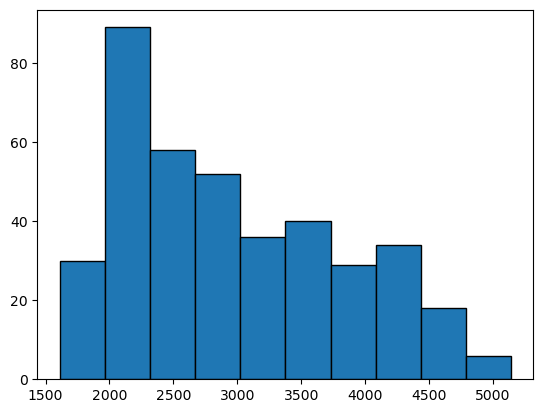

In [111]:
#your code here
plt.hist(df["weight"], edgecolor='black')

#### Plot a histogram of the `model_year`

#### Pandas has a convenience function to plot histograms, but it uses the same matplotlib library. You can call the hist() on the column of a DataFrame. Try it.

(array([56., 28., 40., 26., 30., 62., 36., 29., 27., 58.]),
 array([70. , 71.2, 72.4, 73.6, 74.8, 76. , 77.2, 78.4, 79.6, 80.8, 82. ]),
 <BarContainer object of 10 artists>)

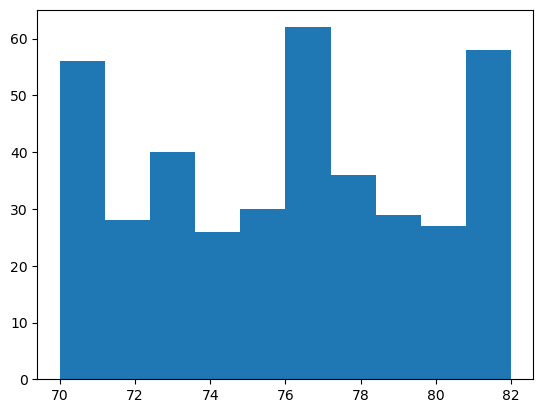

In [112]:
# your code here
plt.hist(df["model_year"])

#### You can also call `aggregate` functions on a DataFrame column, like `min`, `max`, `mean`, `median`, etc. Try it.

#### Compute the average and the median weight

In [113]:
#your code here
df["weight"].min()

1613

In [114]:
df["weight"].mean()

2977.5841836734694

In [115]:
df["weight"].median()

2803.5

If you sum all elements of a boolean array, False is treated as 0 and True as 1. Therefore `bool_array.sum()` is the number of True elements in the array. For example `(df.weight > 2).sum()` is the number of models that weight above 2 tons.

#### Find the number of cars that weight more than 2 tons

In [116]:
# your code here
(df["metric tons"]>2).sum()

26

#### Find how many cars there are for each number of cylinders

In [117]:
#your code here
df["cylinders"].value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

#### Find what are the car models with unusual number of cylinders (3 or 5)

In [118]:
# your code here
unusual_cylinders = df[df['cylinders'].isin([3, 5])]
print(unusual_cylinders[['name', 'cylinders']])

                    name  cylinders
71       mazda rx2 coupe          3
111            maxda rx3          3
243           mazda rx-4          3
274            audi 5000          5
297   mercedes benz 300d          5
327  audi 5000s (diesel)          5
334        mazda rx-7 gs          3


#### Use `df.describe()` to explore the dataset. What years does it cover? What are the extremes of car weight?

In [119]:
# your code here
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,metric tons,lphk
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.350611,11.248505
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.385283,3.913829
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.731645,5.047511
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.009358,8.110828
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.271648,10.340326
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.639625,13.836118
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,2.331468,26.134889


#### Find the lightest and heaviest cars, what make and model are they?

In [120]:
# your code here
lightest = df["weight"].idxmin()
heaviest = df["weight"].idxmax()
lightest_car = df.loc[lightest, ["name", "model_year"]]
print(lightest_car)

name          datsun 1200
model_year             71
Name: 54, dtype: object


In [121]:
heaviest_car = df.loc[heaviest, ["name", "model_year"]]
print(heaviest_car)

name          pontiac safari (sw)
model_year                     71
Name: 44, dtype: object


#### Find the most fuel efficient car (minimum lphk)

In [98]:
#your code here
fuelefficientIndex = df["lphk"].idxmin()
df.loc[fuelefficientIndex, ["name"]]

name    mazda glc
Name: 322, dtype: object

#### For each of the columns in `fit_cols` plot `lphk` as a function of that column (`lphk`  on the `y` axis). Check if any linear relationship is clearly visible

####  pass `alpha=0.5` to plt.scatter to make the points semi-transparent

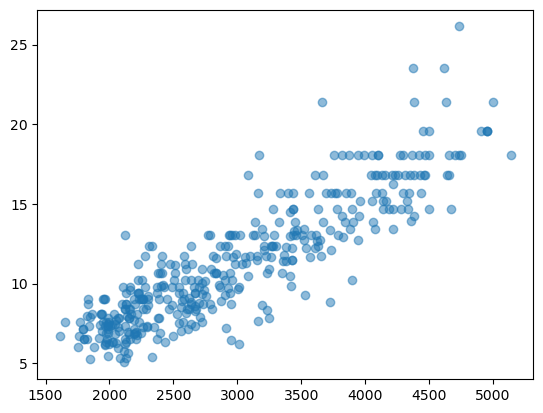

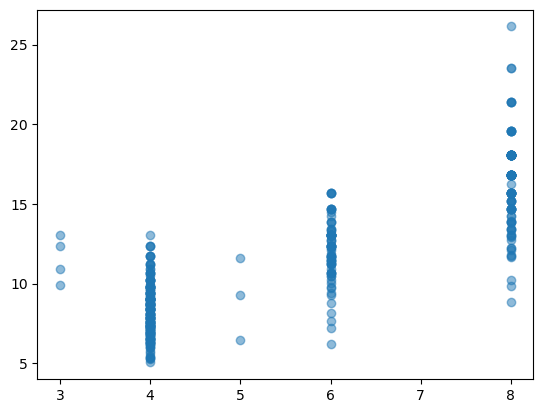

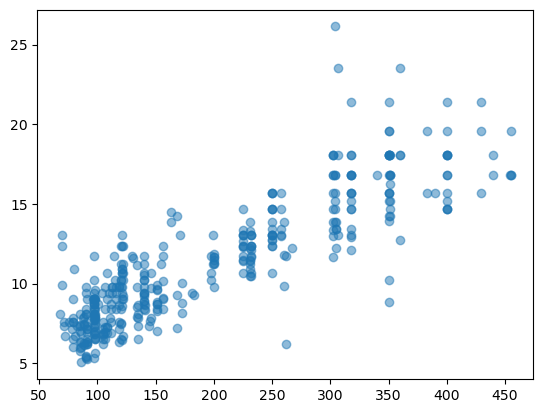

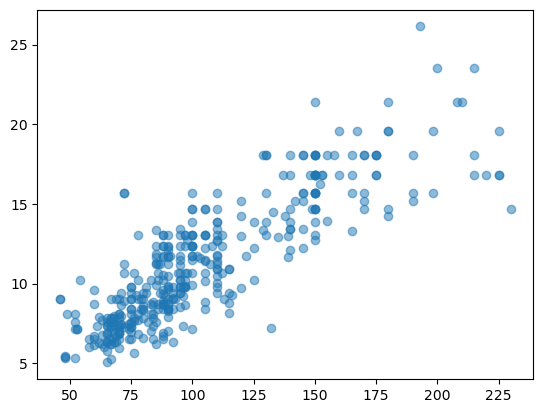

In [122]:
for col in fit_cols:
    plt.scatter(df[col], df["lphk"], alpha=0.5)
    plt.show()

## Linear Fit using 1 variable - weight

#### OBJECTIVE

- Fit a line to the (training) data using the `weight` column as the independent variable and `lphk` as the dependent variable

- predict the `lphk` for test data

#### Split the data into training and testing sets (`random_state=123`)


In [123]:
X = df['weight'].values.reshape(-1, 1)
y = df['lphk']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### Plot training data and testing data on the same scatter plot

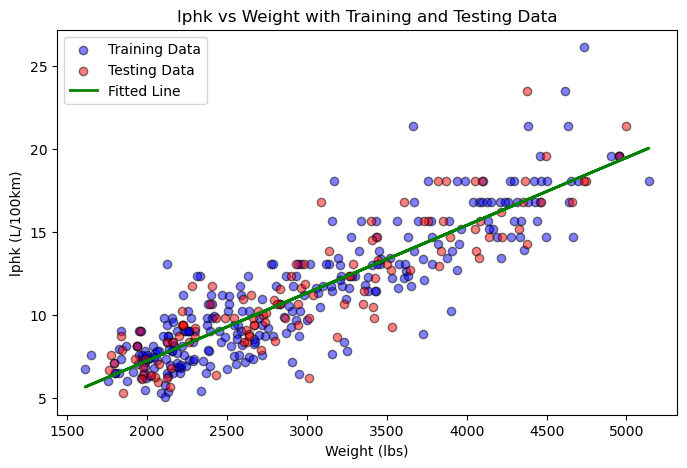

In [125]:
#your code here
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 5))

# Scatter plot for training data
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data', edgecolor='black')

# Scatter plot for testing data
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Testing Data', edgecolor='black')

# Plot the regression line using training data
plt.plot(X_train, model.predict(X_train), color='green', linewidth=2, label='Fitted Line')

# Labels and title
plt.xlabel('Weight (lbs)')
plt.ylabel('lphk (L/100km)')
plt.title('lphk vs Weight with Training and Testing Data')
plt.legend()
plt.show()

#### To fit a line, we need to find the slope and intercept of a line.

![linear equation](https://www.katesmathlessons.com/uploads/1/6/1/0/1610286/2964252_orig.png)
![linear graph](https://www.katesmathlessons.com/uploads/1/6/1/0/1610286/1163738_orig.png)

#### First let's run a fit using np.polyfit to get the line slope and intercept

In [126]:
a, b = np.polyfit(X_train.ravel(), y_train, 1)  # Use ravel() to flatten X_train
# a is slope, b is intercept
a, b 

(0.004079307765071239, -0.9132759011979986)

#### Plot the training data and the line 

#### you need to draw a line using the slope and intercept you found -  the range of x values should be the same as the range of the training data [0.75 - 2.5]

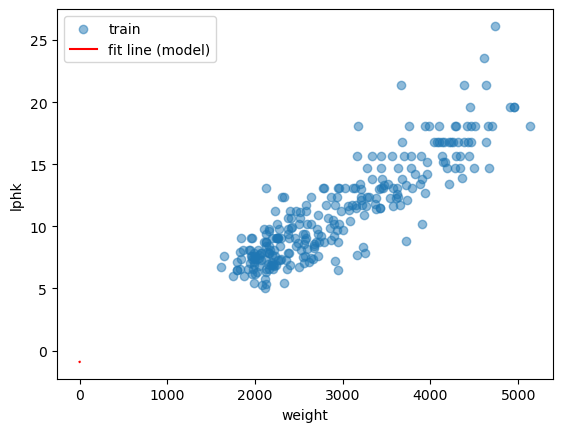

In [127]:
x = np.linspace(0.75, 2.5, 100)
y = a*x + b

plt.scatter(X_train, y_train, label='train', alpha=0.5)
plt.plot (x, y, color='red', label='fit line (model)')
plt.xlabel('weight')
plt.ylabel('lphk')
plt.legend()

#### Using a and b, what will be the predicted consumption of a hypothetical car weighting 1.2 tons?

In [129]:
#your code here
predicted_lphk = a * 1.2 + b
predicted_lphk

-0.9083807318799131

#### Now predict the consumption for a sample car in test set for example X_test[0]

In [130]:
#your code here
predicted_lphk_sample = a * X_test[0] + b
predicted_lphk_sample

array([15.64871362])

#### Plot the fitted line (model) and show the X_test[0] and y_test[0] and y_predicted on the same plot

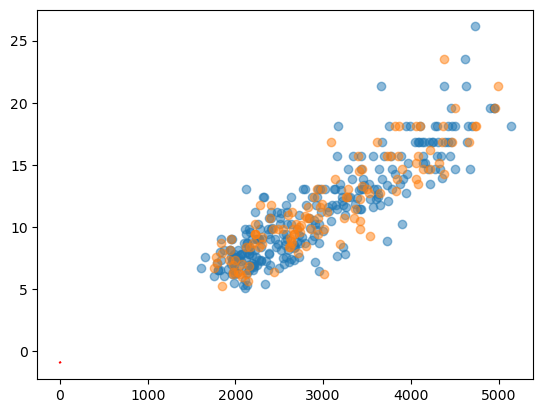

In [133]:
#your code here
# Plot training data
plt.scatter(X_train, y_train, label='Train Data', alpha=0.5)

# Plot testing data
plt.scatter(X_test, y_test, label='Test Data', alpha=0.5)

# Plot fitted line (model)
plt.plot(x, y, color='red', label='Fitted Line (Model)')
plt.show()

#### Compute the error between the predicted value and the actual value

In [134]:
#your code here
y_actual = y_test.iloc[0]

# Predicted value for the first test data point
y_predicted = y_pred[0]

# Compute the error
error = y_predicted - y_actual
error

1.8125959779324017

#### (1) take 10  points from the test set 

#### (2) find the prediction for the 10 points 

#### (3) plot the true and predicted values besides the fitted line (model)

#### (4) compute the average error 

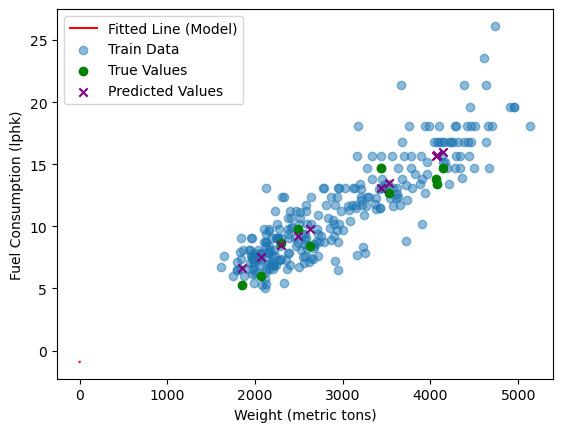

1.2771673927325589

In [137]:
X_test_sample = X_test[:10]
y_test_sample = y_test[:10]

# Step 2: Find the prediction for the 10 points
y_pred_sample = model.predict(X_test_sample)

# Step 3: Plot true and predicted values along with the fitted line
x = np.linspace(0.75, 2.5, 100)
y = a * x + b

plt.plot(x, y, color='red', label='Fitted Line (Model)')  # Fitted line (model)
plt.scatter(X_train, y_train, label='Train Data', alpha=0.5)  # Training data
plt.scatter(X_test_sample, y_test_sample, color='green', label='True Values')  # True values (test sample)
plt.scatter(X_test_sample, y_pred_sample, color='purple', marker='x', label='Predicted Values')  # Predicted values

# Add labels and legend
plt.xlabel('Weight (metric tons)')
plt.ylabel('Fuel Consumption (lphk)')
plt.legend()
plt.show()

# Step 4: Compute the average error
errors = y_pred_sample - y_test_sample
average_error = np.mean(np.abs(errors))
average_error

#### Numerical estimate of how good this fit is
 - One common measure for the quality of a linear fit is the mean square error (MSE)
 - Assume that $y_i$ is the real value from data and $\hat{y}_i$ is the predicted value found as $\hat{y}_i = ax_i + b$
 - Taking the differences between the real and predicted values, then squaring them as $(y_i - \hat{y}_i)^2$ and then averaging gives the MSE
 
$MSE = \frac{1}{N} \sum{(y_i - \hat{y}_i)^2}$

#### Find the MSE for this fit and name it `y_pred1`

In [56]:
# your code here

## Same fit using sklearn.linear_models.LinearRegression
The 4 steps of model use in sklearn:
 1. Import (the Python class for the model you want to use)
 2. Instantiate (the class to create an object)
 3. Fit
 4. Predict
 
Just run the steps below, no need to modify this code

#### 1. Import

In [138]:
from sklearn.linear_model import LinearRegression

#### 2. Instantiate

In [139]:
model = LinearRegression()

#### 3. Fit

#### fit() expects a 2D data structure: `2D numpy array` or a `pd.DataFrame` for X

#### Printing `X_train` and also `type(X_train)`

In [140]:
print(type(X_train))
print(X_train)

<class 'numpy.ndarray'>
[[4341]
 [2051]
 [2500]
 [1835]
 [2130]
 [2189]
 [2350]
 [2755]
 [2391]
 [3085]
 [3465]
 [3892]
 [4951]
 [2171]
 [1965]
 [3302]
 [2451]
 [4077]
 [1613]
 [2375]
 [2265]
 [2890]
 [1649]
 [4464]
 [2019]
 [2215]
 [2130]
 [2145]
 [2160]
 [3449]
 [4440]
 [3725]
 [3735]
 [2003]
 [1965]
 [3432]
 [2288]
 [2158]
 [4498]
 [2720]
 [2230]
 [2130]
 [4654]
 [4274]
 [2401]
 [1950]
 [2506]
 [2370]
 [1985]
 [2962]
 [3169]
 [2910]
 [4952]
 [2395]
 [2525]
 [2045]
 [2565]
 [1915]
 [2639]
 [2914]
 [1795]
 [4312]
 [1990]
 [4278]
 [3003]
 [3520]
 [4165]
 [4457]
 [1825]
 [2542]
 [1940]
 [2108]
 [3605]
 [4140]
 [1825]
 [2123]
 [4209]
 [3329]
 [1985]
 [2234]
 [3193]
 [1800]
 [2125]
 [3563]
 [4633]
 [4732]
 [1985]
 [3102]
 [2615]
 [3785]
 [2164]
 [4638]
 [4360]
 [1945]
 [2472]
 [4422]
 [3632]
 [2904]
 [2670]
 [3620]
 [2188]
 [2930]
 [2790]
 [3672]
 [2155]
 [3900]
 [3060]
 [2124]
 [3570]
 [2200]
 [2335]
 [3459]
 [3962]
 [3250]
 [2807]
 [3265]
 [3781]
 [4257]
 [2155]
 [4237]
 [2290]
 [2085]


#### As you can see the type of X_train, X_test are `Series`.  

#### `Series` and `DataFrame` are two main data structures in pandas. 

#### `Series` is 1D, 

#### and `DataFrame` is a multi-dimensional table made up of a collection of Series.

#### Because sklearn model.fit() function does not accept Pandas Series as the X argument, we need to convert `X_train` and `X_test` `Series` to either a Numpy array or a DataFrame

In [141]:
X_train_df = pd.DataFrame(X_train)
X_train_df

,0
0,4341
1,2051
2,2500
3,1835
4,2130
...,...
269,4335
270,2945
271,2110
272,2585


you can see the difference in the form of printing output for `Series` and `DataFrame` types. 

#### Having X_train as a data frame, fit the model

In [142]:
#solution
model.fit(X_train_df, y_train)

LinearRegression()

#### 4. Predict

#### predict() takes a 2D array or pd.DataFrame with the same as used in fit() 

#### Change the `X_test` type from `Series` to `DataFrame` and then predict the values for the test set

### name your prediction `y_pred_test`

In [143]:
# your code here
y_pred_test = model.predict(X_test)
y_pred_test

array([15.64871362,  7.53089117, 15.97913755,  9.24012113,  9.79490698,
       13.1154635 ,  8.46913196, 13.46628397, 15.73029978,  6.63344346,
       16.28100633, 11.89575048, 14.79205899,  7.55128771, 15.62831709,
       11.25937847,  8.46913196, 19.471025  , 15.80372732, 13.80894582,
       11.4837404 ,  8.14278734,  9.77451044,  6.26630577,  7.14335693,
       14.67375907,  9.69292429,  7.83275995, 11.10028547,  6.56817454,
       13.13993935,  9.71332083, 12.49948803, 11.05133377, 11.38583701,
       10.14572745,  7.7552531 , 10.50878584,  9.46856236, 16.93777488,
       14.87364515, 12.79319819,  8.9096972 , 13.48668051,  9.88873106,
       11.67546786, 10.20283776,  9.83570006,  8.8566662 , 12.40158464,
        9.98663445,  7.44930502, 16.72973018, 13.05835319, 12.99716358,
       16.95409211, 18.44711875,  8.14278734, 10.643403  ,  7.20454655,
       16.30140287, 19.29969407,  8.1754218 , 10.28442391, 14.71047284,
        6.61304693,  7.85723579, 11.18187162, 10.63116507, 11.37

#### Take a look at `model.coef_` and `model.intercept_` and compare them to a and b from before

In [66]:
model.coef_, model.intercept_

In [67]:
# recalling the value of a and b
a, b

(np.float64(8.158615530142473), np.float64(-0.9132759011979984))

#### sklearn comes with a variety of metrics used to estimate quality of models, including the MSE. 

#### Run the cell below and verify that the result is the same as the one you got before

In [144]:
from sklearn import metrics
test_error = metrics.mean_squared_error(y_test, y_pred_test)
test_error

3.1070355767277245

#### predict the values for the TRAIN set

#### name your prediction `y_pred_train`

#### Find the MSE for train set

In [145]:
y_pred_train = model.predict(X_train_df)
print(y_pred_train)

train_error = metrics.mean_squared_error(y_train, y_pred_train)
train_error

[16.79499911  7.45338432  9.28499351  6.57225385  7.77564964  8.0163288
  8.67309735 10.32521699  8.84034897 11.67138855 13.2215255  14.96338992
 19.28337684  7.94290126  7.10256386 12.55659834  9.08510743 15.71806186
  5.66664752  8.77508004  8.32635619 10.87592354  5.8135026  17.29675396
  7.32284648  8.1223908   7.77564964  7.83683925  7.89802887 13.15625658
 17.19885058 14.28214552 14.3229386   7.25757755  7.10256386 13.08690835
  8.42018027  7.88987026 17.43545043 10.18244122  8.18358041  7.77564964
 18.07182244 16.52168549  8.88114204  7.04137424  9.30946936  8.7546835
  7.18415001 11.1696337  12.01405041 10.9575097  19.28745615  8.8566662
  9.38697621  7.42890848  9.55014852  6.89859847  9.85201729 10.97382693
  6.40908154 16.67669918  7.20454655 16.53800272 11.33688532 13.44588743
 16.07704094 17.26819881  6.53146077  9.45632444  7.00058116  7.68590487
 13.79262859 15.97505825  6.53146077  7.74709448 16.25653048 12.66673965
  7.18415001  8.19989765 12.11195379  6.42947808  7.75

3.3985838436465925

## Multiple explanatory variables
Regression with multiple explanatory variables
is no different from the simple case with one variable we just saw, the prediction for 3 explanatory variables looks like this:

$ \hat{y} = a_1 x_1 + a_2 x_2 + a_3 x_3 + b $

The coefficients in `linreg.coef_` will be `[a1, a2, a3]` after the fit()

#### Using the X with all columns from `fit_cols` copy and repeat the fit and predict steps above to obtain a new fit
 - Import is no longer needed since the LinearRegression class is already imported
 - It's up to you whether to instantiate a new object or reuse the old one. It's considered to be a good practice to create a new one in such cases, since it reduced the risk of confusion, but it's not a strict rule.

In [146]:
# Use X with all columns in fit_cols
X = df[fit_cols]
y = df['lphk']
X.head()

,weight,cylinders,displacement,horsepower
0,3504,8,307.0,130.0
1,3693,8,350.0,165.0
2,3436,8,318.0,150.0
3,3433,8,304.0,150.0
4,3449,8,302.0,140.0


In [147]:
print(X.shape)
print(y.shape)

(392, 4)
(392,)


In [148]:
model_miltiple = LinearRegression()
model_miltiple.fit(X, y)

LinearRegression()

In [149]:
model_miltiple.coef_, model_miltiple.intercept_

(array([ 0.00236062,  0.33441202, -0.00189028,  0.03399986]),
 -0.7947638154407173)

#### Take a look at the coefficients (they come in the same order as columns in X)

In [150]:
list(zip(X.columns, model_miltiple.coef_))

[('weight', 0.0023606164842975828),
 ('cylinders', 0.33441201756575406),
 ('displacement', -0.001890275588894208),
 ('horsepower', 0.03399985672476906)]

#### Use `metrics.mean_squared_error()` to compute the MSE again. Does it mean we got a better or worse fit?

In [151]:
mse2 = metrics.mean_squared_error(y, model_miltiple.predict(X))
mse2

2.7834576195587077

#### Compare this erro with the train_error + test_error in the previous section

In [77]:
# your code here

#### Try excluding each of the 4 columns from the X (one at a time), run the fit and compute MSE each time. Which of the column results in the largest degradation in quality of fit when removed?
 - This can be interpreted as an estimate of importance of that column in explaining the dependant variable

In [79]:
# your code here

#### Which of the 4 columns is least valuable for the fit?

#your answer here: 